# Evaluate Trends in Fake News Circulation on Twitter in the run-up to the 2020 US Presidential Elections

# Team Members
Abhishek Bais, Samer Baslan, Jimmy Liang, Rohan Kumar

# Import packages


In [ ]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Mount Google Drive
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-process real news

In [ ]:
# Read in the real news
# Prune unwanted columns
# Set type to real
real_news = pd.read_csv('/content/drive/My Drive/255/datasets/real_news.csv', ).iloc[:, 2:]
real_news = real_news[['title', 'content', 'publication']]
real_news.columns = ['title','content','publication','type']
real_news['type'] = 'real'
real_news.head(5)

,title,content,publication,type
0,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,New York Times,real
1,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",New York Times,real
2,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,New York Times,real
3,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",New York Times,real
4,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,New York Times,real


# Handle missing entry columns in real news

In [ ]:
# Inspect the dataset to find missing entries
real_news.isnull().sum()

title          0
content        0
publication    0
type           0
dtype: int64

# Pre-process fake news

In [ ]:
# Read in the fake news
# Prune unwanted columns
# Treat hate, satire, conspiracy, fake news in fake news dataset as fake news
fake_news = pd.read_csv('/content/drive/My Drive/255/datasets/fake_news.csv', ).iloc[:, 2:]
fake_news = fake_news[['title', 'text','site_url']]
fake_news['type'] = 'fake'
fake_news.head(5)

,title,text,site_url,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,fake


# Handle missing entry columns in fake news

In [ ]:
# Inspect the dataset to find missing entries
fake_news.isnull().sum()

title       680
text         46
site_url      0
type          0
dtype: int64

In [ ]:
# Drop entries with null text
# Drop unwanted columns
fake_news.dropna(subset=['text'], axis=0, inplace=True)
fake_news['site_url'] = fake_news['site_url'].apply(lambda x:x.split('.')[0])
fake_news['title'].fillna("", inplace=True)
fake_news.dropna(inplace=True)
fake_news.reset_index(drop=True, inplace=True)
fake_news.columns = ['title','content','publication','type']
fake_news.isnull().sum()

title          0
content        0
publication    0
type           0
dtype: int64

In [ ]:
# Report real news entries post drop columns
real_news.shape

(15712, 4)

In [ ]:
# Report fake news entries post drop columns
fake_news.shape

(12953, 4)

# Merge real, fake news in prep for data modelling

In [ ]:
# Prepare clean dataset of real, fake news
all_news = pd.concat([fake_news, real_news])
all_news.reset_index(drop=True, inplace=True)
all_news.head(5)

,title,content,publication,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake


In [ ]:
# Report real, fake news entries post pre-processing
all_news.shape

(28665, 4)

# Visualize real vs fake

In [ ]:
all_news['title_length'] = all_news['title'].apply(len)
all_news['content_length'] = all_news['content'].apply(len)
all_news['title_ucase_length'] = all_news['title'].apply(lambda x:len(re.findall('([A-Z])', x)))
all_news['content_ucase_length'] = all_news['content'].apply(lambda x:len(re.findall('([A-Z])', x)))
all_news['title_punctuation_length'] = all_news['title'].apply(lambda x:len(re.sub(r'[^\w\s]','',x)))
all_news['content_punctuation_length'] = all_news['content'].apply(lambda x:len(re.sub(r'[^\w\s]','',x)))
all_news['content'] = all_news['title']+', '+all_news['content']
all_news

,title,content,publication,type,title_length,content_length,title_ucase_length,content_ucase_length,title_punctuation_length,content_punctuation_length
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Muslims BUSTED: They Stole Millions In Gov’t B...,100percentfedup,fake,53,505,13,12,51,494
1,Re: Why Did Attorney General Loretta Lynch Ple...,Re: Why Did Attorney General Loretta Lynch Ple...,100percentfedup,fake,59,1789,10,68,57,1736
2,BREAKING: Weiner Cooperating With FBI On Hilla...,BREAKING: Weiner Cooperating With FBI On Hilla...,100percentfedup,fake,68,1363,18,37,67,1323
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,100percentfedup,fake,125,271,44,14,118,265
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,100percentfedup,fake,99,2095,32,91,94,2058
...,...,...,...,...,...,...,...,...,...,...
28660,An eavesdropping Uber driver saved his 16-year...,An eavesdropping Uber driver saved his 16-year...,Washington Post,real,87,4563,2,148,84,4383
28661,Plane carrying six people returning from a Cav...,Plane carrying six people returning from a Cav...,Washington Post,real,83,3514,4,171,83,3372
28662,After helping a fraction of homeowners expecte...,After helping a fraction of homeowners expecte...,Washington Post,real,105,6911,2,179,103,6744
28663,"Yes, this is real: Michigan just banned bannin...","Yes, this is real: Michigan just banned bannin...",Washington Post,real,60,4133,2,85,58,4035


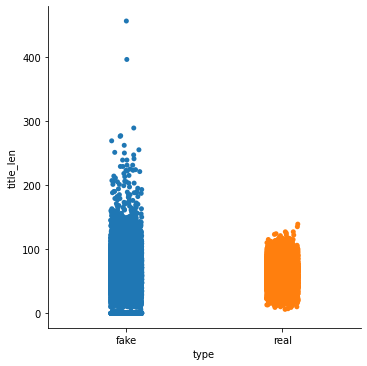

In [ ]:
# Real vs fake news - title length
sns.catplot(x="type", y="title_length", data=all_news)

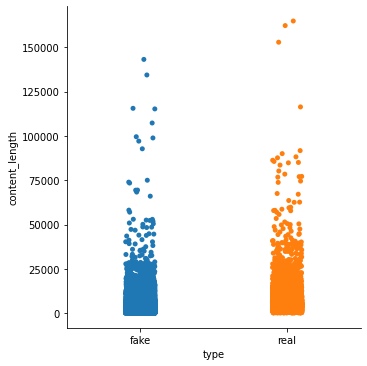

In [ ]:
# Real vs fake news - content length
sns.catplot(x="type", y="content_length", data=all_news)

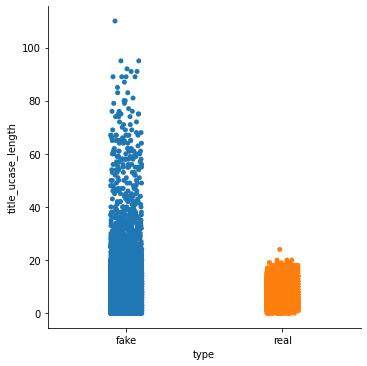

In [ ]:
# Real vs fake news - title uppercase length
sns.catplot(x="type", y="title_ucase_length", data=all_news)

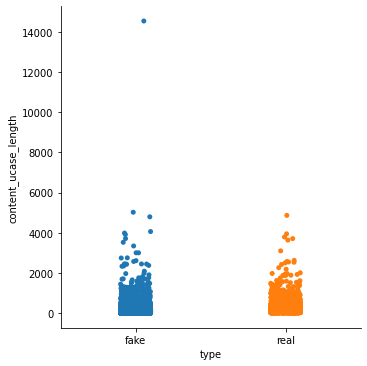

In [ ]:
# Real vs fake news - content uppercase length
sns.catplot(x="type", y="content_ucase_length", data=all_news)

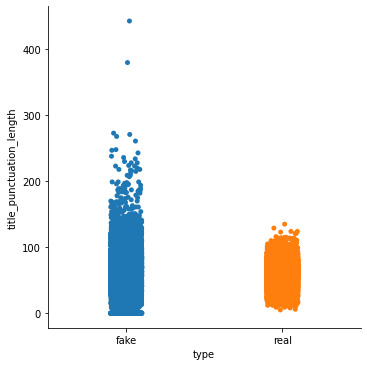

In [ ]:
# Real vs fake news - title punctuation length
sns.catplot(x="type", y="title_punctuation_length", data=all_news)

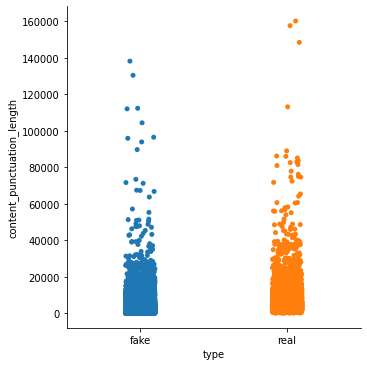

In [ ]:
# Real vs fake news - content punctuation length
sns.catplot(x="type", y="content_punctuation_length", data=all_news)

# Real, fake news content pre-processing

In [ ]:
# Clean and lemmatize content
def clean_and_lemmatize(text):
  # 1. remove special characters and numbers
  # 2. lowercase text
  # 3. lemmatize and remove stop words
  # 4. skip 4 letter words like that, they
  # 5. concatenate the cleaned text
  lemmatizer = WordNetLemmatizer()
  # 1. remove special characters and numbers
  clean_and_lemma_text = re.sub('[^a-zA-Z]', ' ', text)

  # 2. lowercase text
  clean_and_lemma_text = clean_and_lemma_text.lower()
    
  # 3. lemmatize good size words, remove stop words, recreate content
  stop_words = set(stopwords.words('english'))
  word_list = clean_and_lemma_text.split()
  clean_and_lemma_text = ' '.join([lemmatizer.lemmatize(w) for w in word_list if not w in stop_words and len(w)>4])   

  return clean_and_lemma_text

  all_news['content'] = all_news['content'].apply(clean_and_lemmatize)

# Inspect cleaned, pre-processed all news

In [ ]:
all_news

,title,content,publication,type,title_length,content_length,title_ucase_length,content_ucase_length,title_punctuation_length,content_punctuation_length
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Muslims BUSTED: They Stole Millions In Gov’t B...,100percentfedup,fake,53,505,13,12,51,494
1,Re: Why Did Attorney General Loretta Lynch Ple...,Re: Why Did Attorney General Loretta Lynch Ple...,100percentfedup,fake,59,1789,10,68,57,1736
2,BREAKING: Weiner Cooperating With FBI On Hilla...,BREAKING: Weiner Cooperating With FBI On Hilla...,100percentfedup,fake,68,1363,18,37,67,1323
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,100percentfedup,fake,125,271,44,14,118,265
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,100percentfedup,fake,99,2095,32,91,94,2058
...,...,...,...,...,...,...,...,...,...,...
28660,An eavesdropping Uber driver saved his 16-year...,An eavesdropping Uber driver saved his 16-year...,Washington Post,real,87,4563,2,148,84,4383
28661,Plane carrying six people returning from a Cav...,Plane carrying six people returning from a Cav...,Washington Post,real,83,3514,4,171,83,3372
28662,After helping a fraction of homeowners expecte...,After helping a fraction of homeowners expecte...,Washington Post,real,105,6911,2,179,103,6744
28663,"Yes, this is real: Michigan just banned bannin...","Yes, this is real: Michigan just banned bannin...",Washington Post,real,60,4133,2,85,58,4035


# Write cleaned, merged real and fake news to file



In [ ]:
# Write merged real, fake news to csv
all_news.to_csv(r'/content/drive/My Drive/255/datasets/all_news_preprocessed.csv', index = False, header=True)